# Topic Modeling

In [67]:
import Topic_modeling

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,30)

import pandas as pd
import numpy as np

from gensim.models import Word2Vec
import gensim, logging


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer

OMP_NUM_THREADS=1

In [68]:
everything = Topic_modeling.Topic_modeling('Excels/CodingOverview.xls', 'everything')
arin = Topic_modeling.Topic_modeling('Excels/ARIN.xls', 'arin')
meth = Topic_modeling.Topic_modeling('Excels/METH.xls', 'meth')
pred = Topic_modeling.Topic_modeling('Excels/PRED.xls', 'pred')
asses = Topic_modeling.Topic_modeling('Excels/ASSES.xls', 'asses')
feas = Topic_modeling.Topic_modeling('Excels/FEAS.xls', 'feas')
bpgo = Topic_modeling.Topic_modeling('Excels/BPGO.xls', 'bpgo')
bpop = Topic_modeling.Topic_modeling('Excels/BPOP.xls', 'bpop')
tech = Topic_modeling.Topic_modeling('Excels/TECH.xls', 'tech')
lack = Topic_modeling.Topic_modeling('Excels/LACK.xls', 'lack')

#### Run num. of Topics only on CODINGOVERVIEW

In [60]:
everything = Topic_modeling.Topic_modeling('Excels/CodingOverview.xls', 'everything')

Nº topics: 2
Score: 0.36973304703533283
Nº topics: 4
Score: 0.31779930785430344
Nº topics: 6
Score: 0.32203319404370156
Nº topics: 8
Score: 0.2987117859012108
Nº topics: 10
Score: 0.3012957191975953
Nº topics: 12
Score: 0.3105786334540617
Nº topics: 14
Score: 0.3138630118021654
Nº topics: 16
Score: 0.3447992529434168
Nº topics: 18
Score: 0.324545665736495


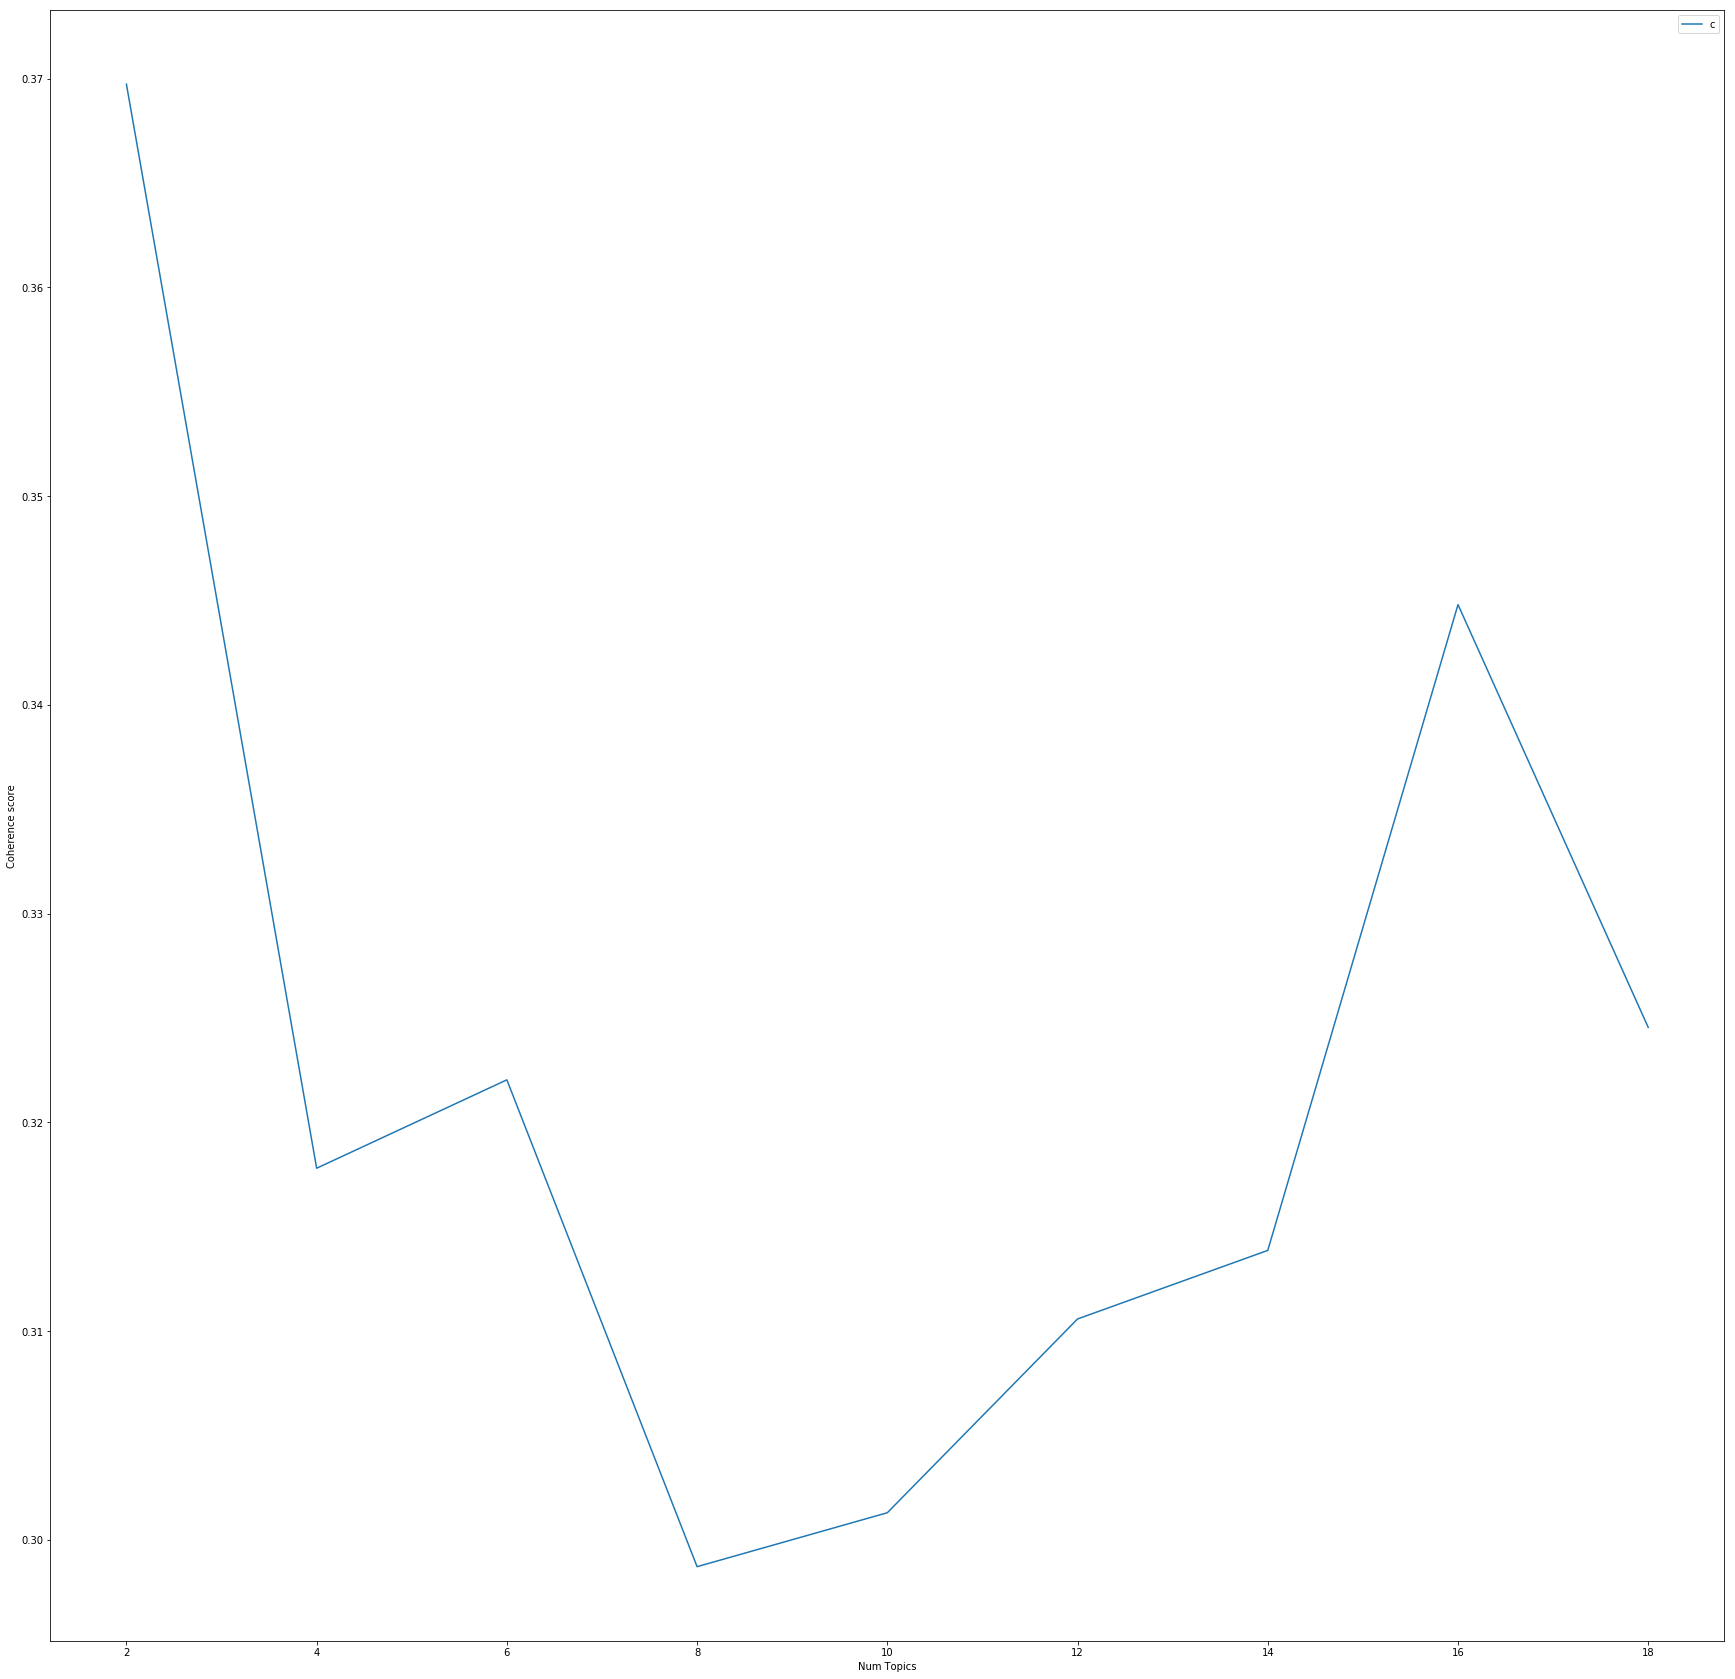

The best model has 2 topics


In [69]:
everything.modeling()

In [11]:
everything.save_html_lda()

C:\Users\giuseppec\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Creating word2vec model and transform the words into vectors + PCA + TSNE

In [77]:
plt.rcParams["figure.figsize"] = (25,25)
data = [everything.data_lemmatized]
#data = [everything.data_lemmatized, arin.data_lemmatized, meth.data_lemmatized, pred.data_lemmatized, asses.data_lemmatized,feas.data_lemmatized, bpgo.data_lemmatized, bpop.data_lemmatized, tech.data_lemmatized, lack.data_lemmatized]


data_name = ['everything']
#data_name = ['everything','arin', 'meth','pred','asses','feas','bpgo','bpop', 'tech','lack']



min_count = [5,10]
# Optimal between 5-50
# http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
perplexity = [5,10,20]
for data_idx in range(len(data)):
    for c in min_count:
        # Selective model, minimum number of times a word appears = min_count
        model = Word2Vec(data[data_idx], min_count=c)
        print (data_name[data_idx])
        X = model[model.wv.vocab]

        # Creating PCA with 2 components and exporting the plot figure
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        
        

        plt.scatter(result[:, 0], result[:, 1])
        words = list(model.wv.vocab)
        for i, word in enumerate(words):
            plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        plt.savefig('PCA_{}_{}.png'.format(data_name[data_idx],c), format='png')
        plt.close()
        # Creating TSNE with 2 components and different perplexity
        for p in perplexity:
            tsne = TSNE(n_components=2, perplexity=5)
            result = tsne.fit_transform(X)
            plt.scatter(result[:, 0], result[:, 1])
            words = list(model.wv.vocab)
            for i, word in enumerate(words):
                plt.annotate(word, xy=(result[i, 0], result[i, 1]))
            plt.savefig('TSNE_{}_{}_{}.png'.format(data_name[data_idx],c, p), format='png')
            plt.close()

everything
everything


#### 3D Visualization of word2vec using TSNE

In [78]:
model = Word2Vec('data', min_count=5)
X = model[model.wv.vocab]
tsne = TSNE(n_components=2, perplexity=30)
result = tsne.fit_transform(X)

RuntimeError: you must first build vocabulary before training the model

IndexError: index 2 is out of bounds for axis 1 with size 2

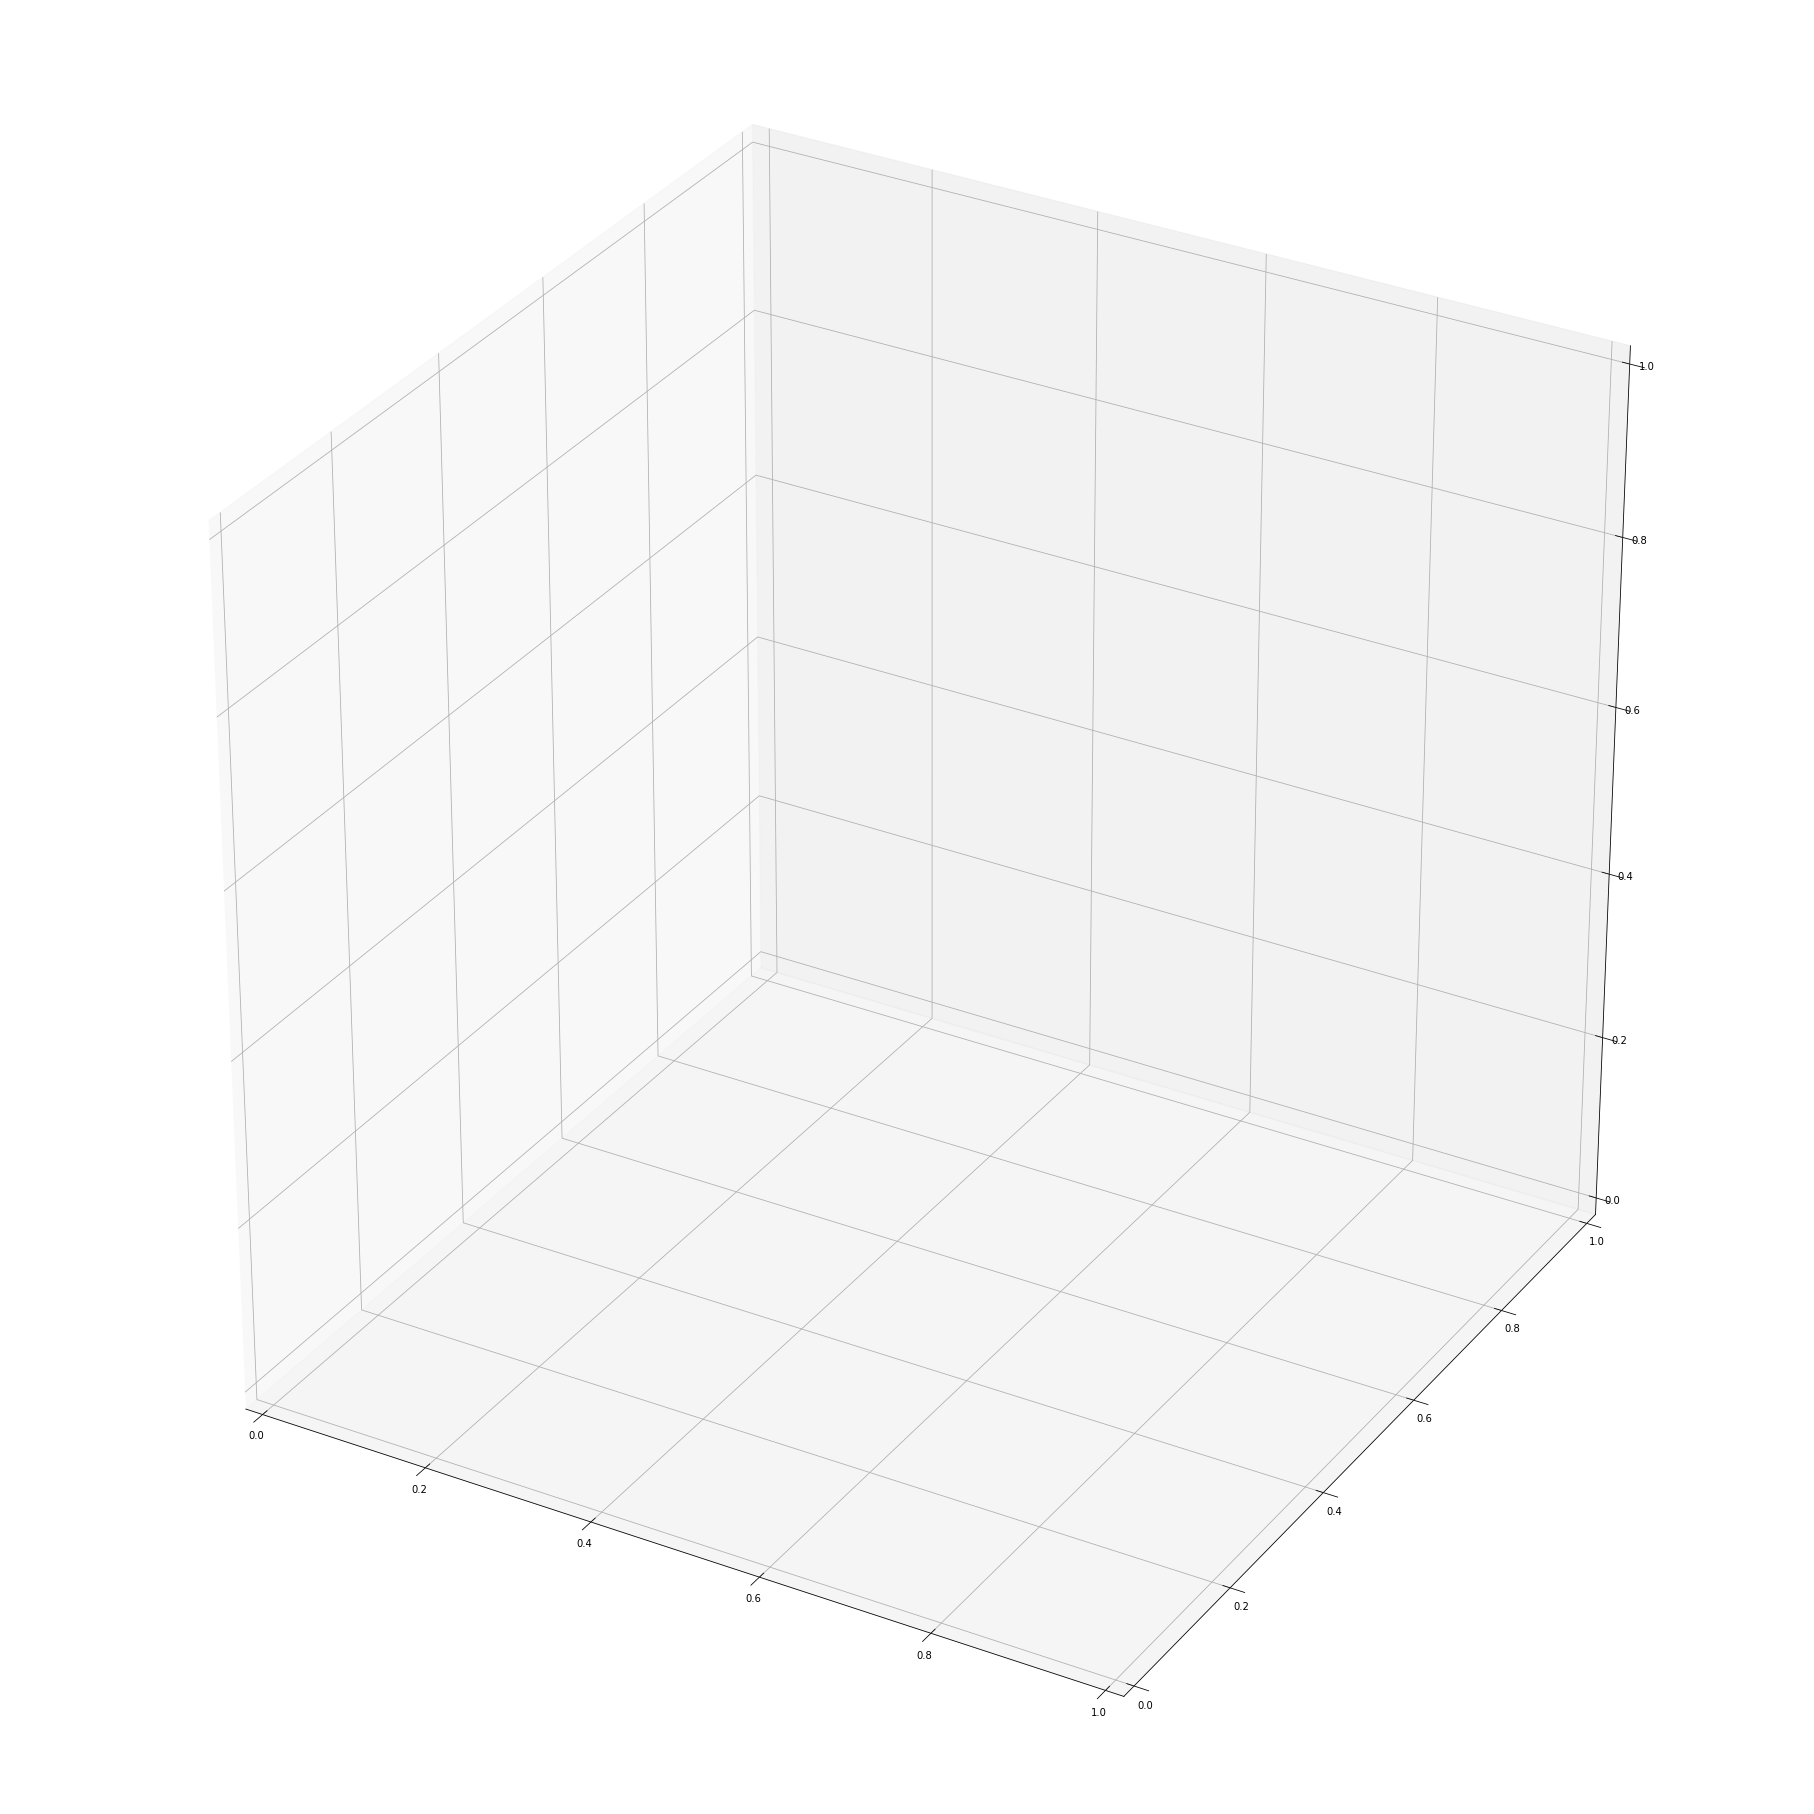

In [79]:
fig = plt.figure()
ax = Axes3D(fig)
colors = cm.rainbow(np.linspace(0, 1, 1))
plt.rcParams["figure.figsize"] = (5,5)
print(result[:, 2])
plt.scatter(result[:, 0], result[:, 1], result[:, 2], c=colors, alpha=0.3)
plt.title('3D word2vec visualization')
plt.show()


# Topological Analysis

### Using kmapper to create a 2D topology based on the word2vec extraction

In [80]:
#model = Word2Vec(best_practices.data_lemmatized)
model = Word2Vec(everything.data_lemmatized)
X = model[model.wv.vocab]
words = list(model.wv.vocab)

In [81]:
# Import the class
import kmapper as km
from sklearn import cluster

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.2)

# Visualize it
mapper.visualize(graph, path_html="Visualizations/word2vec_top_analysis.html", X =X, X_names = words,
                 title="Topological analysis word2vec");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1357, 100)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (1357, 100) using lens shaped (1357, 2)

Creating 100 hypercubes.

Created 211 edges and 78 nodes in 0:00:00.236337.
Wrote visualization to: Visualizations/word2vec_top_analysis.html


## Mapper with LSA 

https://kepler-mapper.scikit-tda.org/notebooks/KeplerMapper-Newsgroup20-Pipeline.html

In [82]:
# from kmapper import jupyter
import kmapper as km
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

In [83]:
#X = np.array([string for elem in bad_practices.data for string in elem])
X = np.array([string for elem in everything.data for string in elem])


mapper = km.KeplerMapper(verbose=2)

projected_X = mapper.fit_transform(X,
    projection=[TfidfVectorizer(analyzer="char",
                                ngram_range=(1,6),
                                max_df=0.83,
                                min_df=0.05),
                TruncatedSVD(n_components=100,
                             random_state=1729),
                Isomap(n_components=2,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()]);

KeplerMapper()
..Composing projection pipeline of length 3:
	Projections: TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.83, max_features=None, min_df=0.05,
        ngram_range=(1, 6), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
		TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=1729, tol=0.0)
		Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=-1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
	Distance matrices: False
False
False
	Scalers: None
None
MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (867,)

..Projecting data using: 
	TfidfVectorizer(analyzer='char', binary=False, decode_error=

In [84]:
from sklearn import cluster
graph = mapper.map(projected_X,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.33);

Mapping on data shaped (867, 2) using lens shaped (867, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

Cube_14 is empty.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 clusters.

   > Found 3 cluste

In [57]:
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,3),
                      max_df=0.97,
                      min_df=0.02)

interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names()

In [58]:
html = mapper.visualize(graph, 
                        path_html="Visualizations/TDA/everything_LSA.html",
                        X=interpretable_inverse_X,
                        X_names=interpretable_inverse_X_names,
                        title="")

Wrote visualization to: Visualizations/TDA/everything_LSA.html
